# Titanic
使用邏輯迴歸預測存活機率
處理二分類問題的方法: 邏輯回歸 / Random Forest / SVM
分析要點: 數據屬性的認識/ 數據分析與處理 / Feature engineering / model ensemble

# 資料預處理

In [1]:
import pandas as pd #資料分析
import numpy as np  #計算
from pandas import Series,DataFrame

#read train data
data_train=pd.read_csv("/Users/WanPing/Desktop/python(Transcend)/ML/train for Titanic.csv") #要將 "\" 改為 "/"
data_train

#SibSp => 堂兄弟妹的數量
#Parch => 父母小孩的數量
#Cabin => 客艙
#Embarked => 登船處


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
#Train data的訊息
data_train.info()
#891位乘客
#Age僅有714筆資料
#Cabin僅有204筆資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [3]:
#Train data的描述
data_train.describe()

#Survived: mean 0.38 => 38%的人存活
#Pclass: mean 2.3 => 登船的人,大多倉別為2或3
#Age: mean 29.69 => 登船的人平均29.69歲 (依據有資料的做計算)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
import matplotlib
from matplotlib.font_manager import*
import matplotlib.pyplot as plt

fig=plt.figure()
fig.set(alpha=0.2)  #設定圖表參數

#存活情況圖
#plt.subplot2grid((2,3),(0,0)) #大圖內分小圖
data_train.Survived.value_counts().plot(kind='bar')  #柱狀圖
plt.title(u"Survived status (1=Survived)") 
plt.ylabel(u"number of peoeple")
plt.show()

#300+人存活

<Figure size 640x480 with 1 Axes>

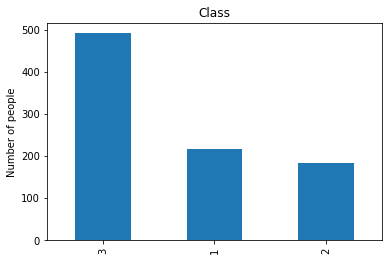

In [5]:
#倉別情況圖
#plt.subplot2grid((2,3),(0,0))
data_train.Pclass.value_counts().plot(kind='bar')  #柱狀圖
plt.title("Class") 
plt.ylabel('Number of people')
plt.show()

#3-Class的人非常多,快500人

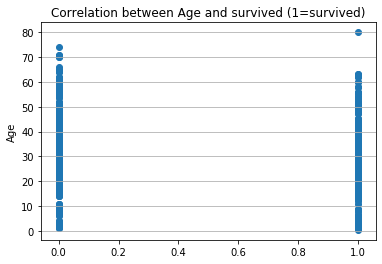

In [6]:
#年齡和存活的情況分配圖
#plt.subplot2grid((2,3),(0,0))
plt.scatter(data_train.Survived,data_train.Age)
plt.ylabel(u"Age")
plt.grid(b=True, which='major',axis='y')
plt.title('Correlation between Age and survived (1=survived)')
plt.show()


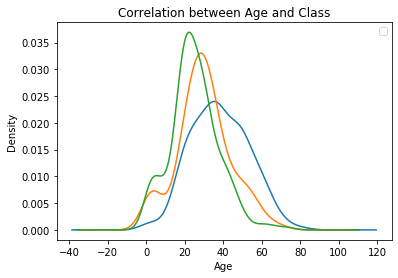

In [7]:
#倉別和年齡的關係
#plt.subplot2grid((2,3),(1,0),colspan=2)
plt.legend(('1-class','2-class','3-class'),loc='best')
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u'Age')
plt.ylabel(u'Density')
plt.title(u'Correlation between Age and Class')
plt.show()

#2-class 和 3-class偏40歲以下

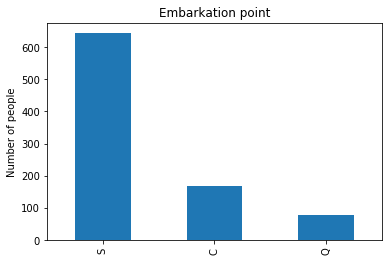

In [8]:
#登船處的人數
#plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u'Embarkation point')
plt.ylabel(u'Number of people')
plt.show()
#在S登船的比C跟Q多很多

<Figure size 432x288 with 0 Axes>

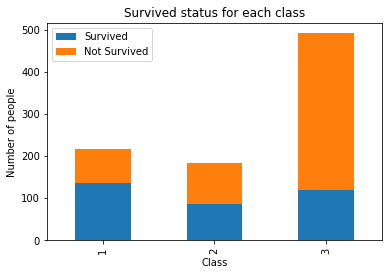

In [11]:
#倉別和存活率的關係
fig=plt.figure()
fig.set(alpha=0.2)  #設定圖表參數
Survived_yes=data_train.Pclass[data_train.Survived ==1].value_counts()
Survived_no=data_train.Pclass[data_train.Survived ==0].value_counts()
df=pd.DataFrame({u'Survived':Survived_yes,u'Not Survived':Survived_no})
df.plot(kind='bar',stacked=True)
plt.title(u'Correlation between Survived status and Class')
plt.xlabel(u'Class')
plt.ylabel(u'Number of people')
plt.show()

#1-class的存活率比2-class跟3-class高. 故推測存活率跟金錢地位可能有關

<Figure size 432x288 with 0 Axes>

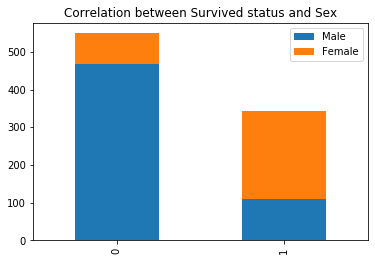

In [13]:
#性別和存活率的關係
fig=plt.figure()
fig.set(alpha=0.2)  #設定圖表參數
Survived_male=data_train.Survived[data_train.Sex =='male'].value_counts()
Survived_female=data_train.Survived[data_train.Sex =='female'].value_counts()
df=pd.DataFrame({u'Male':Survived_male,u'Female':Survived_female})
df.plot(kind='bar',stacked=True)
plt.title(u'Correlation between Survived status and Sex')
plt.xlabel=(u'Sex')
plt.ylabel=(u'Number of people')
plt.show()

#女性的存活率大於男性

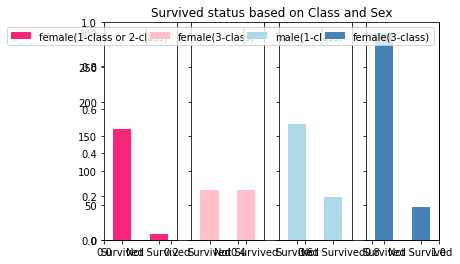

In [15]:
#各艙別中的男女存活率
fig=plt.figure()
fig.set(alpha=0.65) #設定圖表參數
plt.title(u'Survived status based on Class and Sex')
ax1=fig.add_subplot(141)  #???
data_train.Survived[data_train.Sex=='female'][data_train.Pclass !=3].value_counts().plot(kind='bar'
                                                                                        ,label='female(1-Class or 2-Class)'
                                                                                        ,color='#FA2479')
ax1.set_xticklabels([u'Survived',u'Not Survived'], rotation=0)
ax1.legend([u'female(1-class or 2-class)'],loc='best')

ax2=fig.add_subplot(142,sharey=ax1)  #???
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar'
                                                                                           ,label='female(3-Class)',color='pink')
ax2.set_xticklabels([u'Survived',u'Not Survived'],rotation=0)
plt.legend([u'female(3-class)'],loc='best')

ax3=fig.add_subplot(143,sharey=ax1) #???
data_train.Survived[data_train.Sex =='male'][data_train.Pclass !=3].value_counts().plot(kind='bar'
                                                                                       ,label='male(1-class or 2-class)'
                                                                                       ,color='lightblue')
ax3.set_xticklabels([u'Survived',u'Not Survived'],rotation=0)
plt.legend([u'male(1-class)'],loc='best')

ax4=fig.add_subplot(144,sharey=ax1) #???
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar'
                                                                                          ,label='male(3-Class)'
                                                                                          ,color='steelblue')
ax4.set_xticklabels([u'Survived',u'Not Survived'],rotation=0)
plt.legend([u'female(3-class)'],loc='best')

plt.show()

TypeError: 'str' object is not callable

<Figure size 432x288 with 0 Axes>

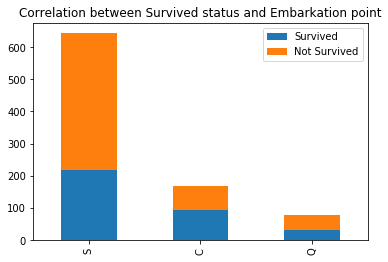

In [19]:
#登船處和存活率的關係
fig=plt.figure()
fig.set(alpha=0.2) #設定圖表參數
Survived_yes=data_train.Embarked[data_train.Survived ==1].value_counts()
Survived_no=data_train.Embarked[data_train.Survived ==0].value_counts()
df=pd.DataFrame({u'Survived':Survived_yes,u'Not Survived':Survived_no})
df.plot(kind='bar',stacked=True)
plt.title(u'Correlation between Survived status and Embarkation point')
plt.xlabel(u'Embarkation point')
plt.ylabel(u'Number of people')
plt.show()
#C港口的存活似乎比其他處大

TypeError: 'str' object is not callable

<Figure size 432x288 with 0 Axes>

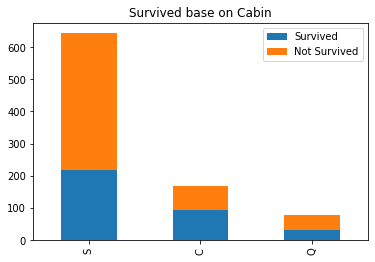

In [20]:
fig=plt.figure()
fig.set(alpha=0.2)
Survived_cabin=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df.plot(kind='bar',stacked=True)
plt.title(u'Survived base on Cabin')
plt.xlabel(u'Cabin')
plt.ylabel(u'Number of people')
plt.show()

# 缺失樣本的處理方式:
*對於缺失樣本的比率過高的話, 則捨去此樣本,避免Noise
*缺失的樣本比率尚可, 且為離散的屬性, 則可將NaN作為一種新類別
*缺失的樣本比率尚可, 且為連續的屬性, 則可將其規劃範圍分類(比如20~30一類, 31~40一類), 轉為離散的屬性,便可將其Nan作為一種新類別
*缺失的樣本比率尚可, 則可根據現有的資料模擬

In [30]:
#運用Random Forest來模擬, 補足缺失的樣本
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df): 
    makeup_age_df=df[['Age','Fare','Parch','SibSp','Pclass']]  #將有資料的屬性丟入Regression中
    age_known=makeup_age_df[makeup_age_df.Age.notnull()].as_matrix() #年紀已知的乘客
    age_unknown=makeup_age_df[makeup_age_df.isnull()].as_matrix()   #年紀未知的乘客
    goal=age_known[:, 0]
    value=age_known[:, 1:]
    
    Rfr=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    Rfr.fit(goal,value) #Fit到Randomforestregression中
    age_predicted=Rfr.predict(age_unkown[:,1::1])
    df.loc[(df.Age.isnull()),'Age']=age_predicted  #將預測的資料補足缺失的樣本  
    return df,Rfr

def set_cabin_type(df):   #將Cabin 分類
    df.loc[(df.Cabin.notnull()),'Cabin']='yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='No'
    return df

data_train,Rfr=set_missing_ages(data_train)
data_train=set_Cabin_type(data_train)

### sth wrong? ##  11/13 10:20PM

C:\Users\WanPing\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\WanPing\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


ValueError: Expected 2D array, got 1D array instead:
array=[22.   38.   26.   35.   35.   54.    2.   27.   14.    4.   58.   20.
 39.   14.   55.    2.   31.   35.   34.   15.   28.    8.   38.   19.
 40.   66.   28.   42.   21.   18.   14.   40.   27.    3.   19.   18.
  7.   21.   49.   29.   65.   21.   28.5   5.   11.   22.   38.   45.
  4.   29.   19.   17.   26.   32.   16.   21.   26.   32.   25.    0.83
 30.   22.   29.   28.   17.   33.   16.   23.   24.   29.   20.   46.
 26.   59.   71.   23.   34.   34.   28.   21.   33.   37.   28.   21.
 38.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.
 32.5  32.5  54.   12.   24.   45.   33.   20.   47.   29.   25.   23.
 19.   37.   16.   24.   22.   24.   19.   18.   19.   27.    9.   36.5
 42.   51.   22.   55.5  40.5  51.   16.   30.   44.   40.   26.   17.
  1.    9.   45.   28.   61.    4.    1.   21.   56.   18.   50.   30.
 36.    9.    1.    4.   45.   40.   36.   32.   19.   19.    3.   44.
 58.   42.   24.   28.   34.   45.5  18.    2.   32.   26.   16.   40.
 24.   35.   22.   30.   31.   27.   42.   32.   30.   16.   27.   51.
 38.   22.   19.   20.5  18.   35.   29.   59.    5.   24.   44.    8.
 19.   33.   29.   22.   30.   44.   25.   24.   37.   54.   29.   62.
 30.   41.   29.   30.   35.   50.    3.   52.   40.   36.   16.   25.
 58.   35.   25.   41.   37.   63.   45.    7.   35.   65.   28.   16.
 19.   33.   30.   22.   42.   22.   26.   19.   36.   24.   24.   23.5
  2.   50.   19.    0.92 17.   30.   30.   24.   18.   26.   28.   43.
 26.   24.   54.   31.   40.   22.   27.   30.   22.   36.   61.   36.
 31.   16.   45.5  38.   16.   29.   41.   45.   45.    2.   24.   28.
 25.   36.   24.   40.    3.   42.   23.   15.   25.   28.   22.   38.
 40.   29.   45.   35.   30.   60.   24.   25.   18.   19.   22.    3.
 22.   27.   20.   19.   42.    1.   32.   35.   18.    1.   36.   17.
 36.   21.   28.   23.   24.   22.   31.   46.   23.   28.   39.   26.
 21.   28.   20.   34.   51.    3.   21.   33.   44.   34.   18.   30.
 10.   21.   29.   28.   18.   28.   19.   32.   28.   42.   17.   50.
 14.   21.   24.   64.   31.   45.   20.   25.   28.    4.   13.   34.
  5.   52.   36.   30.   49.   29.   65.   50.   48.   34.   47.   48.
 38.   56.    0.75 38.   33.   23.   22.   34.   29.   22.    2.    9.
 50.   63.   25.   35.   58.   30.    9.   21.   55.   71.   21.   54.
 25.   24.   17.   21.   37.   16.   18.   33.   28.   26.   29.   36.
 54.   24.   47.   34.   36.   32.   30.   22.   44.   40.5  50.   39.
 23.    2.   17.   30.    7.   45.   30.   22.   36.    9.   11.   32.
 50.   64.   19.   33.    8.   17.   27.   22.   22.   62.   48.   39.
 36.   40.   28.   24.   19.   29.   32.   62.   53.   36.   16.   19.
 34.   39.   32.   25.   39.   54.   36.   18.   47.   60.   22.   35.
 52.   47.   37.   36.   49.   49.   24.   44.   35.   36.   30.   27.
 22.   40.   39.   35.   24.   34.   26.    4.   26.   27.   42.   20.
 21.   21.   61.   57.   21.   26.   80.   51.   32.    9.   28.   32.
 31.   41.   20.   24.    2.    0.75 48.   19.   56.   23.   18.   21.
 18.   24.   32.   23.   58.   50.   40.   47.   36.   20.   32.   25.
 43.   40.   31.   70.   31.   18.   24.5  18.   43.   36.   27.   20.
 14.   60.   25.   14.   19.   18.   15.   31.    4.   25.   60.   52.
 44.   49.   42.   18.   35.   18.   25.   26.   39.   45.   42.   22.
 24.   48.   29.   52.   19.   38.   27.   33.    6.   17.   34.   50.
 27.   20.   30.   25.   25.   29.   11.   23.   23.   28.5  48.   35.
 36.   21.   24.   31.   70.   16.   30.   19.   31.    4.    6.   33.
 23.   48.    0.67 28.   18.   34.   33.   41.   20.   36.   16.   51.
 30.5  32.   24.   48.   57.   54.   18.    5.   43.   13.   17.   29.
 25.   25.   18.    8.    1.   46.   16.   25.   39.   49.   31.   30.
 30.   34.   31.   11.    0.42 27.   31.   39.   18.   39.   33.   26.
 39.   35.    6.   30.5  23.   31.   43.   10.   52.   27.   38.   27.
  2.    1.   62.   15.    0.83 23.   18.   39.   21.   32.   20.   16.
 30.   34.5  17.   42.   35.   28.    4.   74.    9.   16.   44.   18.
 45.   51.   24.   41.   21.   48.   24.   42.   27.   31.    4.   26.
 47.   33.   47.   28.   15.   20.   19.   56.   25.   33.   22.   28.
 25.   39.   27.   19.   26.   32.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.